# Exercise: 
Build a classifier for credit fraud detection. Use the variables from V1 to V28 as predicter. Class is the outcome variable. What is the model accuracy on test? What could be the possible reason for high accuracy? 

Problem description: https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients
        

In [1]:
import pandas as pd
import numpy as np
from sklearn import *
import matplotlib.pyplot as plt

%matplotlib inline

/Users/abulbasar/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/abulbasar/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/Users/abulbasar/anaconda3/lib/python3.6/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be rem

In [2]:
df = pd.read_csv("/data/creditcard-fraud.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [5]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

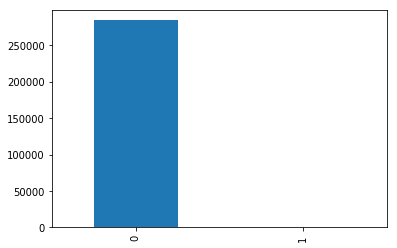

In [6]:
df.Class.value_counts().plot.bar()

In [7]:
target = "Class"
#y = np.where(df[target] == 2, 1, 0)
y = df[target]
X = df.copy()
del X[target]
X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                        test_size = 0.3, random_state = 12345)
print("X_train", X_train.shape, "X_test", X_test.shape)

pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.LogisticRegression())
])

pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)


X_train (199364, 30) X_test (85443, 30)


0.9992392589211521

In [8]:
y_test_pred = pipe.predict(X_test) 

In [9]:
from mlxtend.plotting import plot_confusion_matrix

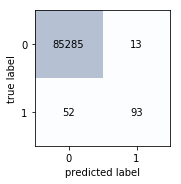

In [10]:
plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_pred));

Accuracy 0.9992392589211521 
Precision 0.8773584905660378 
Recall 0.6413793103448275


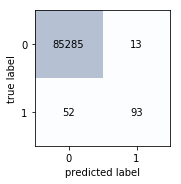

In [15]:
y_test_prob = pipe.predict_proba(X_test)[:, 1] #Probability(y=1)
y_test_pred = np.where(y_test_prob > 0.5, 1, 0) # Predict class based on prob and prob threshold
plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_pred));
print("Accuracy", metrics.accuracy_score(y_test, y_test_pred) ,
     "\nPrecision", metrics.precision_score(y_test, y_test_pred),
     "\nRecall", metrics.recall_score(y_test, y_test_pred))

Accuracy 0.9993445923013002 
Precision 0.8027210884353742 
Recall 0.8137931034482758


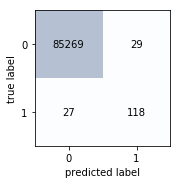

In [16]:
y_test_prob = pipe.predict_proba(X_test)[:, 1] #Probability(y=1)
y_test_pred = np.where(y_test_prob > 0.1, 1, 0) # Predict class based on prob and prob threshold
plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_pred));
print("Accuracy", metrics.accuracy_score(y_test, y_test_pred) ,
     "\nPrecision", metrics.precision_score(y_test, y_test_pred),
     "\nRecall", metrics.recall_score(y_test, y_test_pred))

Accuracy 0.9989934810341398 
Precision 0.8831168831168831 
Recall 0.4689655172413793


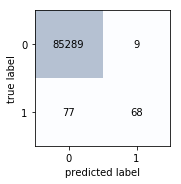

In [17]:
y_test_prob = pipe.predict_proba(X_test)[:, 1] #Probability(y=1)
y_test_pred = np.where(y_test_prob > 0.9, 1, 0) # Predict class based on prob and prob threshold
plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_pred));
print("Accuracy", metrics.accuracy_score(y_test, y_test_pred) ,
     "\nPrecision", metrics.precision_score(y_test, y_test_pred),
     "\nRecall", metrics.recall_score(y_test, y_test_pred))

In [18]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_prob)

Text(0,0.5,'TPR')

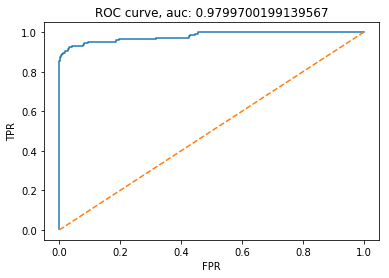

In [24]:
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], ls = "--")
auc = metrics.auc(fpr, tpr)
plt.title("ROC curve, auc: " + str(auc))
plt.xlabel("FPR")
plt.ylabel("TPR")

In [25]:
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_test_prob)

Text(0,0.5,'Recall')

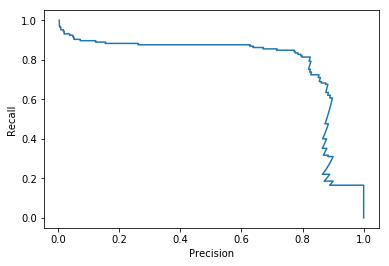

In [27]:
plt.plot(precision, recall)
plt.xlabel("Precision")
plt.ylabel("Recall")